(1, 128, 128, 1)


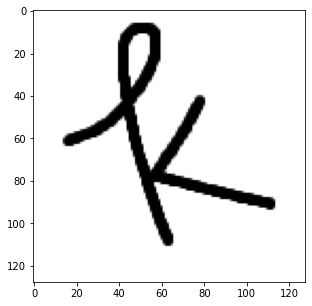

In [54]:
import tensorflow as tf
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.backend import expand_dims

img = cv.imread("04.png", 0)
#img = cv.imread("X.png", 0)
img = img_to_array(img) / 255
img = expand_dims(img, 0)

print(img.shape)
fig = plt.figure(figsize=(5, 5))
plt.imshow(img[0], cmap = 'gray')
plt.show()

## 可更改參數：Kernel 大小、特徵
### 1. Γ特徵
#### 3*3
                    [5, 5, 5],
                    [5, -1, -1],
                    [5, -1, -1]
#### 5*5                    
                    [5, 5, 5, 5, 5],
                    [5, -1, -1, -1, -1],
                    [5, -1, -1, -1, -1],
                    [5, -1, -1, -1, -1],
                    [5, -1, -1, -1, -1]
                    
                    
### 2. ∟特徵
#### 3*3
                    [5, -1, -1],
                    [5, -1, -1],
                    [5, 5, 5]
#### 5*5                     
                    [5, -1, -1, -1, -1],
                    [5, -1, -1, -1, -1],
                    [5, -1, -1, -1, -1],
                    [5, -1, -1, -1, -1],
                    [5, 5, 5, 5, 5]
### 3. /特徵
#### 3*3
                    [-1, -1, 5],
                    [-1, 5, -1],
                    [5, -1, -1]
#### 5*5                     
                    [-1, -1, -1, -1, 5],
                    [-1, -1, -1, 5, -1],
                    [-1, -1, 5, -1, -1],
                    [-1, 5, -1, -1, -1],
                    [5, -1, -1, -1, -1]                    
### 4. \特徵
#### 3*3
                    [5, -1, -1],
                    [-1, 5, -1],
                    [-1, -1, 5]
#### 5*5                     
                    [5, -1, -1, -1, -1],
                    [-1, 5, -1, -1, -1],
                    [-1, -1, 5, -1, -1],
                    [-1, -1, -1, 5, -1],
                    [-1, -1, -1, -1, 5]                   
### 5. ｜特徵
#### 3*3
                    [5, -1, -1],
                    [5, -1, -1],
                    [5, -1, -1]
#### 5*5                     
                    [5, -1, -1, -1, -1],
                    [5, -1, -1, -1, -1],
                    [5, -1, -1, -1, -1],
                    [5, -1, -1, -1, -1],
                    [5, -1, -1, -1, -1]                    
### 6. O特徵
#### 3*3
                    [5, 5, 5],
                    [5, -1, 5],
                    [5, 5, 5]
#### 5*5                     
                    [5, 5, 5, 5, 5],
                    [5, -1, -1, -1, 5],
                    [5, -1, -1, -1, 5],
                    [5, -1, -1, -1, 5],
                    [5, 5, 5, 5, 5]                    
### 7. K特徵
#### 3*3
                    [5, -1, 5],
                    [5, 5, -1],
                    [5, -1, 5]
#### 5*5                     
                    [5, -1, -1, -1, 5],
                    [5, -1, -1, 5, -1],
                    [5, 5, 5, -1, -1],
                    [5, -1, -1, 5, -1],
                    [5, -1, -1, -1, 5]                    
### 8. 銳利化特徵
#### 3*3
                    [0, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]
#### 5*5                     
                    [0, 0, -1, 0, 0],
                    [0, 0, -1, 0, 0],
                    [-1, -1, 5, -1, -1],
                    [0, 0, -1, 0, 0],
                    [0, 0, -1, 0, 0]                    

(1, 128, 128, 1)


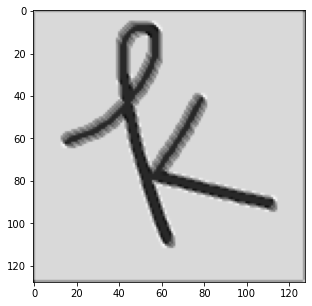

In [55]:
"""
  Convolution
  https://www.tensorflow.org/api_docs/python/tf/nn/conv2d
"""

# Kernel Format: out_channels, in_channels, filter_height, filter_width
# (Good for design)
kernel = np.array([
                [5, -1, -1],
                [-1, 5, -1],
                [-1, -1, 5]
])

# Rearange to: filter_height, filter_width, in_channels, output_channels
kernel = kernel.reshape((3, 3, 1, 1))

out = tf.nn.conv2d(img, kernel, strides=[1, 1, 1, 1], padding='SAME')
print(out.shape)
fig = plt.figure(figsize=(5, 5))
plt.imshow(out[0], cmap = 'gray')
plt.show()

## 可更改參數
### 1.ksize：kernel size可改為3,5,7
### 2.stride：移動步長
### 3.padding：’VALID’為不填充；’SAME’為填充

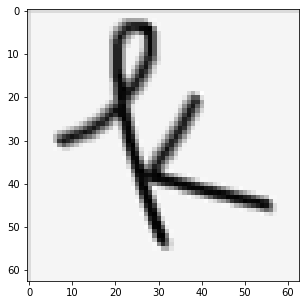

(1, 63, 63, 1)


In [56]:
"""
  Average Pooling 2D
  https://www.tensorflow.org/api_docs/python/tf/nn/avg_pool2d
"""
avgout = tf.nn.avg_pool2d(out, ksize=3, strides=2, padding='VALID')

fig = plt.figure(figsize=(5, 5))
plt.imshow(avgout[0], cmap = 'gray')
plt.show()
print(avgout.shape)
#img => out  疊加看看

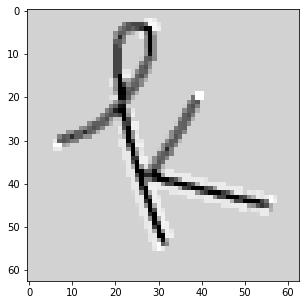

In [57]:
"""
  Max Pooling 2D
  https://www.tensorflow.org/api_docs/python/tf/nn/max_pool2d
"""
maxout = tf.nn.max_pool2d(out, ksize=3, strides=2, padding='VALID')

fig = plt.figure(figsize=(5, 5))
plt.imshow(maxout[0], cmap = 'gray')
plt.show()

#img => out  疊加看看